In [1888]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1889]:
lamda0 = 1000 #нм
n = 1000 #точек 
time = 20#фс
c = 3. * 10** (8) # м/с
T0 = 1/100#
T = 1.

In [1890]:
omega0 = 2. * np.pi * c *  10 ** 9 / lamda0
omega0

1884955592153875.8

In [1891]:
def eval_b1():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))

    beta1 = (B1 * w**2 * w1**2)/(c* (-w**2 + w1**2)**2 * np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))) + np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))/c
    return beta1

def eval_b2():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))
    B2 = 0.4079426
    w2 = (2 * np.pi * c)/(0.1162414*10**(-6))
    beta2 = (w * ((2 * B1 * w * w1**2)/(-w**2 + w1**2)**2 + (2 * B2 * w * w2 **2)/(-w**2 + w2**2)**2))/(2 * c * np.sqrt(1 + (B1 * w1**2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))) + np.sqrt(1 + (B1* w1** 2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))/c
    return beta2

In [1892]:
def impulse(T):
    return  np.e ** (-1. * T ** 2 / (2. * T0 ** 2))

In [1893]:
beta1 = eval_b1()
beta2 = eval_b2()
beta1 = beta1 * 10 ** 9
beta2 = beta2 * 10 ** 9
print(beta1, beta2)
#beta1 = 0.1

4.353821341267787 4.865877335533778


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


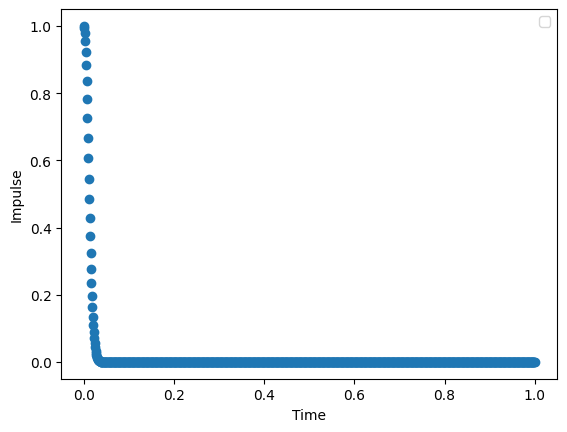

In [1894]:
arr = np.linspace(0, T, n)
t_array = []
dt = arr[1] - arr[0]

for i in range(0, len(arr)):
    t_array.append(dt * i)
    arr[i] = impulse(dt * i)

def draw_impulse_plot(t_array, arr):    
    plt.scatter(t_array, arr)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()
    return 

t = t_array
Nt = len(t_array)
impulse0 = arr
draw_impulse_plot(t, impulse0)

In [1895]:
impulse0

array([1.00000000e+000, 9.95002514e-001, 9.80159407e-001, 9.55911317e-001,
       9.22968438e-001, 8.82275975e-001, 8.34969117e-001, 7.82320531e-001,
       7.25683753e-001, 6.66435968e-001, 6.05923522e-001, 5.45413085e-001,
       4.86050786e-001, 4.28830931e-001, 3.74575107e-001, 3.23921726e-001,
       2.77325369e-001, 2.35064734e-001, 1.97257585e-001, 1.63880886e-001,
       1.34794213e-001, 1.09764664e-001, 8.84916334e-002, 7.06301660e-002,
       5.58118732e-002, 4.36627743e-002, 3.38177268e-002, 2.59313933e-002,
       1.96859169e-002, 1.47956415e-002, 1.10093153e-002, 8.11026744e-003,
       5.91504969e-003, 4.27100397e-003, 3.05316243e-003, 2.16081806e-003,
       1.51403128e-003, 1.05026731e-003, 7.21295477e-004, 4.90427624e-004,
       3.30130003e-004, 2.20010508e-004, 1.45161086e-004, 9.48211785e-005,
       6.13209459e-005, 3.92609404e-005, 2.48863330e-005, 1.56174266e-005,
       9.70300811e-006, 5.96831412e-006, 3.63450530e-006, 2.19122663e-006,
       1.30790935e-006, 7

In [1896]:
dt = t[1] - t[0]
dz = 0.001
dz = dz * 10**(-8)
Nz = 100000
A = []
A.append(impulse0)

In [1897]:
dt

0.001001001001001001

In [1898]:
dz

1.0000000000000001e-11

In [1899]:
print(1/(2.7**2 * 4.86))

0.028225146347383805


In [1900]:
#beta1 = 0.1
eps = 10**(-15)
for i in range(1, Nz):
    new_layer = []
    for j in range(0, len(t)):
        if j != 0:
            #if A[i - 1][j] - A[i - 1][j - 1] > eps:
            
                cur_val = A[i - 1][j] - beta1  / dt * (A[i - 1][j] - A[i - 1][j - 1]) * dz
            #else:
               # cur_val = np.round(A[i - 1][j],15)
        else :
             cur_val = 0
             
        new_layer.append(cur_val)
    A.append(new_layer)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


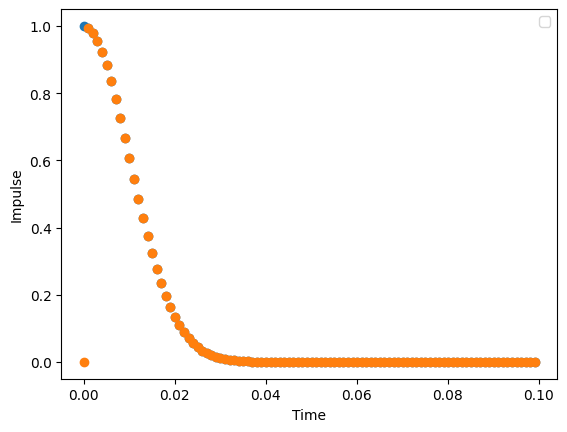

In [1901]:
impulse_plot1 = []
impulse_plot2 = []
impulse_plot3 = []
ind1 = 3
ind2 = 100
ind3 = 700
for i in range(0, Nz):
    impulse_plot1.append(A)

def draw_three_impulses(t, impulse1, impulse2):
    plt.scatter(t, impulse1)
    plt.scatter(t, impulse2)
    #plt.scatter(t, impulse3)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()

draw_three_impulses(t[0:100], A[0][0:100], A[300][0:100])



In [1902]:
1 / beta1

0.2296832877641255

In [1903]:
#A1 + A2i

A1 = []
A1.append(impulse0)
A2 = []
A2.append(np.linspace(0, 0, len(impulse0)))

In [1904]:
beta2

4.865877335533778

In [1905]:
1/ (2. * dt ** 2)

499000.5

In [1906]:
#beta2 = beta2
eps = 10**(-15)
for i in range(1, Nz):
    new_layer = []
    for j in range(0, len(t)):
        if j == 2:
            g = (beta2 * dz / (2. * dt ** 2))
            u = (-1. * A2[i - 1][j] + 2. * A2[i - 1][j - 1] - 1. * A2[i-1][j-2]) 
            cur_val = A1[i - 1][j] - g * u

        if j == 0 or j == 1:
             cur_val = 0.

        if j > 2:
            g = (beta2 * dz / (2. * dt ** 2))
            u = (-2. * A2[i - 1][j] + 5.*  A2[i - 1][j - 1] - 4. * A2[i-1][j-2] + 1. * A2[i-1][j-3]) 
            cur_val = A1[i - 1][j] - g * u
        
        new_layer.append(cur_val)
    A1.append(new_layer)

    new_layer = []
    for j in range(0, len(t)):
        if j == 2:
            g = (beta2 * dz / (2. * dt ** 2))
            u = (1. * A1[i - 1][j] - 2. * A1[i - 1][j - 1] + 1. * A1[i-1][j-2])
            cur_val = A2[i - 1][j] - g * u

        if j > 2:
            g = (beta2 * dz / (2. * dt ** 2))
            u = (2. * A1[i - 1][j] - 5.*  A1[i - 1][j - 1] + 4. * A1[i-1][j-2] - 1. * A1[i-1][j-3])
            cur_val = A2[i - 1][j] - g * u

        if j == 0 or j == 1:
             cur_val = 0.
        #cur_val = min(cur_val, 1.)    
        new_layer.append(cur_val)
    A2.append(new_layer)

In [1907]:
A1[500]

[0.0,
 0.0,
 0.9800876116111235,
 0.9567081543367231,
 0.9214421851711164,
 0.8835852165180106,
 0.8344608164158426,
 0.7823915675685147,
 0.725685282458601,
 0.6664350973071603,
 0.6059238759954239,
 0.5454130101667676,
 0.4860508128556241,
 0.42883094526993537,
 0.3745751217088795,
 0.32392174004377394,
 0.27732538179563593,
 0.2350647447011746,
 0.19725759407584392,
 0.16388089263597924,
 0.13479421844315456,
 0.10976466696002088,
 0.08849163470667809,
 0.07063016591195094,
 0.05581187198757906,
 0.04366277227303191,
 0.03381772424100974,
 0.025931390436946106,
 0.019685914018672708,
 0.014795638699025579,
 0.011009312642392806,
 0.008110265024528232,
 0.005915047561699539,
 0.004271002145623541,
 0.003053160898821604,
 0.0021608167999799532,
 0.0015140302677451568,
 0.0010502665189756721,
 0.0007212948619383902,
 0.0004904271563138089,
 0.0003301296537285602,
 0.0002200102513057868,
 0.0001451609002091896,
 9.48210464273614e-05,
 6.132085343555758e-05,
 3.926087672232707e-05,
 2.48

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


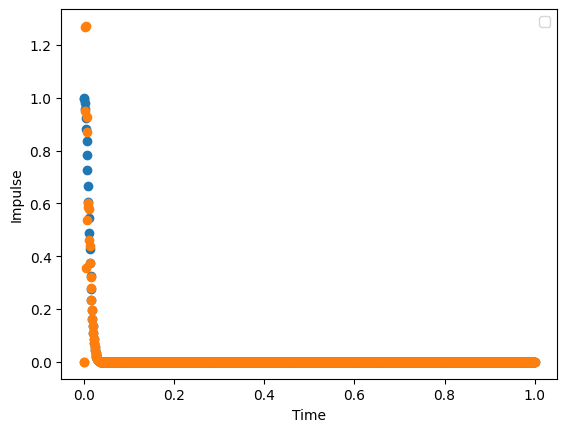

In [1920]:

def draw_three_impulses(t, impulse1, impulse2):
    plt.scatter(t, impulse1)
    plt.scatter(t, impulse2)
    #plt.scatter(t, impulse3)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()

draw_three_impulses(t, A1[0], A1[9999])
